In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 70.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [16]:

import spacy
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')
nlp = spacy.load("en_core_web_sm")



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [17]:
def spacy_morph_analysis(text):
    doc = nlp(text)
    analysis = []
    for token in doc:
        analysis.append([token.text, token.lemma_, token.pos_, token.morph])
    return pd.DataFrame(analysis, columns=["Token", "Lemma", "POS", "Morphology"])


In [18]:
def nltk_morph_analysis(text):
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)

    lemmatizer = nltk.WordNetLemmatizer()
    analysis = []
    for word, pos in pos_tags:
        lemma = lemmatizer.lemmatize(word.lower())
        analysis.append([word, lemma, pos])

    return pd.DataFrame(analysis, columns=["Token", "Lemma", "POS"])


In [19]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:

sample_text = "hi i am Akash , just trying to test , i dont know what exactly to expect from the answer . Lets not ramble more about it "

spacy_results = spacy_morph_analysis(sample_text)



In [21]:
nltk_results = nltk_morph_analysis(sample_text)

In [25]:

from IPython.display import display

print("\nMorphological Analysis using spaCy:")
display(spacy_results)

print("\nMorphological Analysis using NLTK:")
display(nltk_results)



Morphological Analysis using spaCy:


,Token,Lemma,POS,Morphology
0,hi,hi,INTJ,()
1,i,I,PRON,"(Case=Nom, Number=Sing, Person=1, PronType=Prs)"
2,am,be,AUX,"(Mood=Ind, Number=Sing, Person=1, Tense=Pres, ..."
3,Akash,Akash,PROPN,(Number=Sing)
4,",",",",PUNCT,(PunctType=Comm)
5,just,just,ADV,()
6,trying,try,VERB,"(Aspect=Prog, Tense=Pres, VerbForm=Part)"
7,to,to,PART,()
8,test,test,VERB,(VerbForm=Inf)
9,",",",",PUNCT,(PunctType=Comm)



Morphological Analysis using NLTK:


,Token,Lemma,POS
0,The,the,DT
1,children,child,NNS
2,were,were,VBD
3,happily,happily,RB
4,playing,playing,VBG
5,in,in,IN
6,the,the,DT
7,park,park,NN
8,while,while,IN
9,the,the,DT


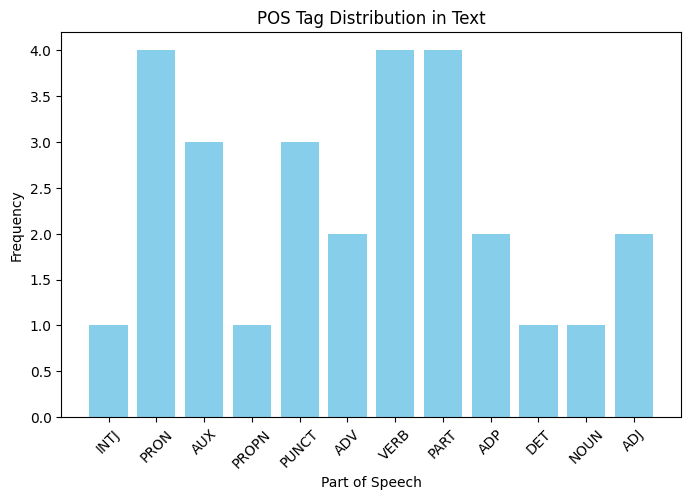

In [26]:


pos_counts = Counter(spacy_results['POS'])
plt.figure(figsize=(8,5))
plt.bar(pos_counts.keys(), pos_counts.values(), color='skyblue')
plt.xlabel("Part of Speech")
plt.ylabel("Frequency")
plt.title("POS Tag Distribution in Text")
plt.xticks(rotation=45)
plt.show()
